In [1]:
import geopandas as gpd
import pandas as pd

In [2]:
ghana = gpd.read_file("data/ghana/ghana/Regions/Map_of_Regions_in_Ghana.shp")

In [3]:
ghana.head()

,Region,geometry
0,Ashanti,"POLYGON ((686446.075 842986.894, 686666.193 84..."
1,Brong Ahafo,"POLYGON ((549970.457 968447.094, 550073.003 96..."
2,Central,"POLYGON ((603176.584 695877.238, 603248.424 69..."
3,Eastern,"POLYGON ((807307.254 797910.553, 807311.908 79..."
4,Greater Accra,"POLYGON ((858081.638 676424.913, 858113.115 67..."


In [4]:
ghana.crs

<Projected CRS: EPSG:32630>
Name: WGS 84 / UTM zone 30N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 6°W and 0°W, northern hemisphere between equator and 84°N, onshore and offshore. Algeria. Burkina Faso. Côte' Ivoire (Ivory Coast). Faroe Islands - offshore. France. Ghana. Gibraltar. Ireland - offshore Irish Sea. Mali. Mauritania. Morocco. Spain. United Kingdom (UK).
- bounds: (-6.0, 0.0, 0.0, 84.0)
Coordinate Operation:
- name: UTM zone 30N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [5]:
df_ghana_facilities = pd.read_csv("data/ghana/ghana/health_facilities.csv")
df_ghana_facilities.head()

,Region,District,FacilityName,Type,Town,Ownership,Latitude,Longitude
0,Ashanti,Offinso North,A.M.E Zion Clinic,Clinic,Afrancho,CHAG,7.40801,-1.96317
1,Ashanti,Bekwai Municipal,Abenkyiman Clinic,Clinic,Anwiankwanta,Private,6.46312,-1.58592
2,Ashanti,Adansi North,Aboabo Health Centre,Health Centre,Aboabo No 2,Government,6.22393,-1.34982
3,Ashanti,Afigya-Kwabre,Aboabogya Health Centre,Health Centre,Aboabogya,Government,6.84177,-1.61098
4,Ashanti,Kwabre,Aboaso Health Centre,Health Centre,Aboaso,Government,6.84177,-1.61098


In [6]:
gdf_ghana_facilities = gpd.GeoDataFrame(
    df_ghana_facilities,
    geometry=gpd.points_from_xy(
        df_ghana_facilities.Longitude,
        df_ghana_facilities.Latitude,
    )
)
gdf_ghana_facilities.crs = "epsg:4326"
gdf_ghana_facilities = gdf_ghana_facilities.to_crs(epsg=32630)

In [7]:
gdf_ghana_facilities.crs

<Projected CRS: EPSG:32630>
Name: WGS 84 / UTM zone 30N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 6°W and 0°W, northern hemisphere between equator and 84°N, onshore and offshore. Algeria. Burkina Faso. Côte' Ivoire (Ivory Coast). Faroe Islands - offshore. France. Ghana. Gibraltar. Ireland - offshore Irish Sea. Mali. Mauritania. Morocco. Spain. United Kingdom (UK).
- bounds: (-6.0, 0.0, 0.0, 84.0)
Coordinate Operation:
- name: UTM zone 30N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [8]:
gdf_ghana_facilities.head()

,Region,District,FacilityName,Type,Town,Ownership,Latitude,Longitude,geometry
0,Ashanti,Offinso North,A.M.E Zion Clinic,Clinic,Afrancho,CHAG,7.40801,-1.96317,POINT (614422.662 818986.851)
1,Ashanti,Bekwai Municipal,Abenkyiman Clinic,Clinic,Anwiankwanta,Private,6.46312,-1.58592,POINT (656373.863 714616.547)
2,Ashanti,Adansi North,Aboabo Health Centre,Health Centre,Aboabo No 2,Government,6.22393,-1.34982,POINT (682573.395 688243.477)
3,Ashanti,Afigya-Kwabre,Aboabogya Health Centre,Health Centre,Aboabogya,Government,6.84177,-1.61098,POINT (653484.490 756478.812)
4,Ashanti,Kwabre,Aboaso Health Centre,Health Centre,Aboaso,Government,6.84177,-1.61098,POINT (653484.490 756478.812)


<Axes: >

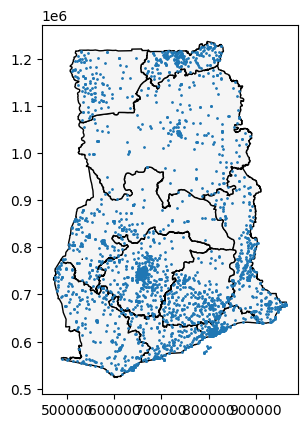

In [9]:
ax = ghana.plot(color="whitesmoke", edgecolor='k')
gdf_ghana_facilities.plot(ax=ax, markersize=1)

In [10]:
ghana.geometry.area / 10**6

0    24379.017777
1    40098.168231
2     9665.626760
3    18987.625847
4     3706.511145
5    69830.576358
6     8629.357677
7    19022.080963
8    20948.296066
9    24317.315180
dtype: float64

# South America Bird Migration

In [11]:
from shapely.geometry import LineString

In [12]:
df_birds = pd.read_csv("data/purple_martin.csv")
df_birds.head()

,timestamp,location-long,location-lat,tag-local-identifier
0,2014-08-15 05:56:00,-88.146014,17.513049,30448
1,2014-09-01 05:59:00,-85.243501,13.095782,30448
2,2014-10-30 23:58:00,-62.906089,-7.852436,30448
3,2014-11-15 04:59:00,-61.776826,-11.723898,30448
4,2014-11-30 09:59:00,-61.241538,-11.612237,30448


In [13]:
gdf_birds = gpd.GeoDataFrame(
    df_birds,
    geometry=gpd.points_from_xy(
        df_birds["location-long"],
        df_birds["location-lat"],
    )
)
gdf_birds.crs = "epsg:4326"

In [14]:
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
americas = world.loc[world['continent'].isin(['North America', 'South America'])]

<Axes: >

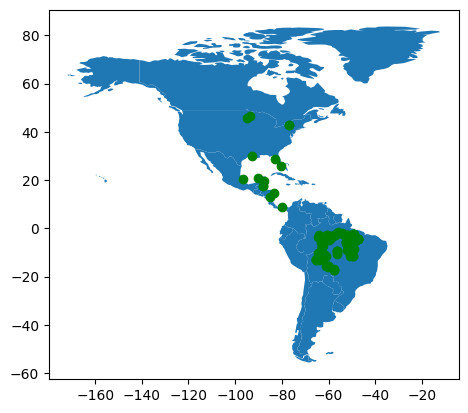

In [15]:
ax = americas.plot()
gdf_birds.plot(color="green", ax=ax)

In [16]:
paths = gdf_birds.groupby("tag-local-identifier")["geometry"].apply(list).apply(lambda x: LineString(x)).reset_index()
paths = gpd.GeoDataFrame(paths, geometry=paths.geometry)
paths.crs = "epsg:4326"
start = gdf_birds.groupby("tag-local-identifier")["geometry"].first()
start.crs = "epsg:4326"
end = gdf_birds.groupby("tag-local-identifier")["geometry"].last()
end.crs = "epsg:4326"

In [17]:
paths.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<Axes: >

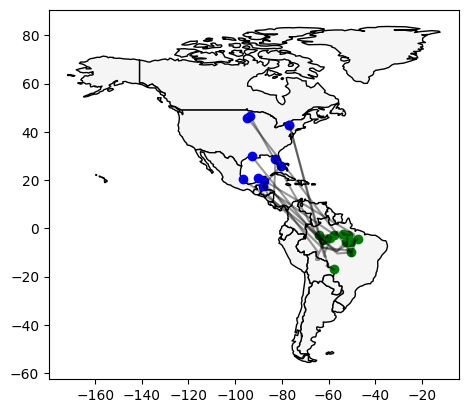

In [18]:
ax = americas.plot(color="whitesmoke", edgecolor="k")
start.plot(color="blue", ax=ax)
end.plot(color="green", ax=ax)
paths.plot(color="k", ax=ax, alpha=0.4)

In [22]:
protected_areas = gpd.read_file("data/SAPA_Aug2019-shapefile/SAPA_Aug2019-shapefile/SAPA_Aug2019-shapefile-polygons.shp")

In [24]:
protected_areas.head()

,WDPAID,WDPA_PID,PA_DEF,NAME,ORIG_NAME,DESIG,DESIG_ENG,DESIG_TYPE,IUCN_CAT,INT_CRIT,...,GOV_TYPE,OWN_TYPE,MANG_AUTH,MANG_PLAN,VERIF,METADATAID,SUB_LOC,PARENT_ISO,ISO3,geometry
0,14067.0,14067,1,Het Spaans Lagoen,Het Spaans Lagoen,"Ramsar Site, Wetland of International Importance","Ramsar Site, Wetland of International Importance",International,Not Reported,Not Reported,...,Not Reported,Not Reported,Not Reported,Management plan is not implemented and not ava...,State Verified,1856,Not Reported,NLD,ABW,"POLYGON ((-69.97523 12.47379, -69.97523 12.473..."
1,14003.0,14003,1,Bubali Pond Bird Sanctuary,Bubali Pond Bird Sanctuary,Bird Sanctuary,Bird Sanctuary,National,Not Reported,Not Applicable,...,Not Reported,Not Reported,Not Reported,Not Reported,State Verified,1899,Not Reported,NLD,ABW,"POLYGON ((-70.04734 12.56329, -70.04615 12.563..."
2,555624439.0,555624439,1,Arikok National Park,Arikok National Park,National Park,National Park,National,Not Reported,Not Applicable,...,Non-profit organisations,Non-profit organisations,Fundacion Parke Nacional Arikok,Not Reported,State Verified,1899,Not Reported,NLD,ABW,"MULTIPOLYGON (((-69.96302 12.48384, -69.96295 ..."
3,303894.0,303894,1,Madidi,Madidi,Area Natural de Manejo Integrado,Natural Integrated Management Area,National,Not Reported,Not Applicable,...,Federal or national ministry or agency,Not Reported,Not Reported,Not Reported,State Verified,1860,BO-L,BOL,BOL,"POLYGON ((-68.59060 -14.43388, -68.59062 -14.4..."
4,303893.0,303893,1,Apolobamba,Apolobamba,Area Natural de Manejo Integado Nacional,National Natural Integrated Management Area,National,Not Reported,Not Applicable,...,Federal or national ministry or agency,Not Reported,Not Reported,Not Reported,State Verified,1860,BO-L,BOL,BOL,"POLYGON ((-69.20949 -14.73334, -69.20130 -14.7..."


In [25]:
south_america = americas.query("continent == 'South America'")

<Axes: >

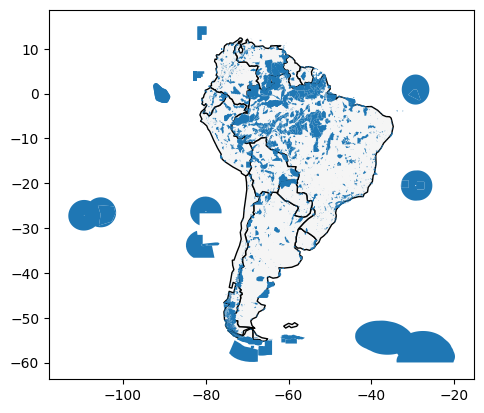

In [68]:
ax = south_america.plot(color="whitesmoke", edgecolor="k")
protected_areas.plot(ax=ax)

In [88]:
total_protected_land = (protected_areas["REP_AREA"] - protected_areas["REP_M_AREA"]).sum()
total_land = south_america.geometry.to_crs("epsg:3035").area.sum() / 10**6


In [89]:
percent_protected_land = (total_protected_land / total_land) * 100

In [90]:
percent_protected_land

30.388874061358962

<Axes: >

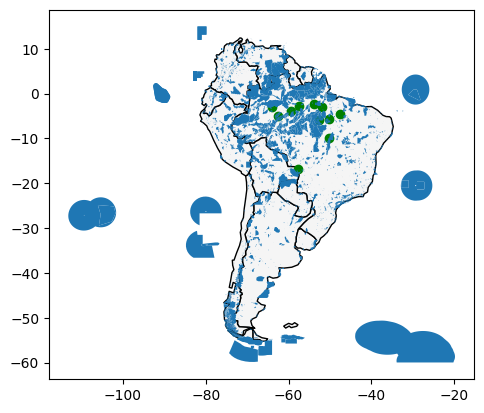

In [92]:
ax = south_america.plot(color="whitesmoke", edgecolor="k")
end.plot(color="green", ax=ax)
protected_areas.query("MARINE != 2").plot(ax=ax)